## Differentiating users based on their onchain interactions

We will take all wallets who have interacted with a given contract address, and see if we can add "features" to spot different clusters of wallets. A feature is just some characteristic/variable, such as if a wallet has an ENS domain registered or not.

This can be done in four steps:
1. Write a query on Dune where the returned data has columns for each feature and rows for each wallet 
2. Add parameters for "contract_address", "blockchain", "month", and "minimum calls"
3. Use the dune-client to pull the data for Opensea in September 2023 versus September 2022
4. Use scikit-learn and pandas to cluster the data (PCA + k-means)

I've already [written the query here](https://dune.com/queries/3070841):

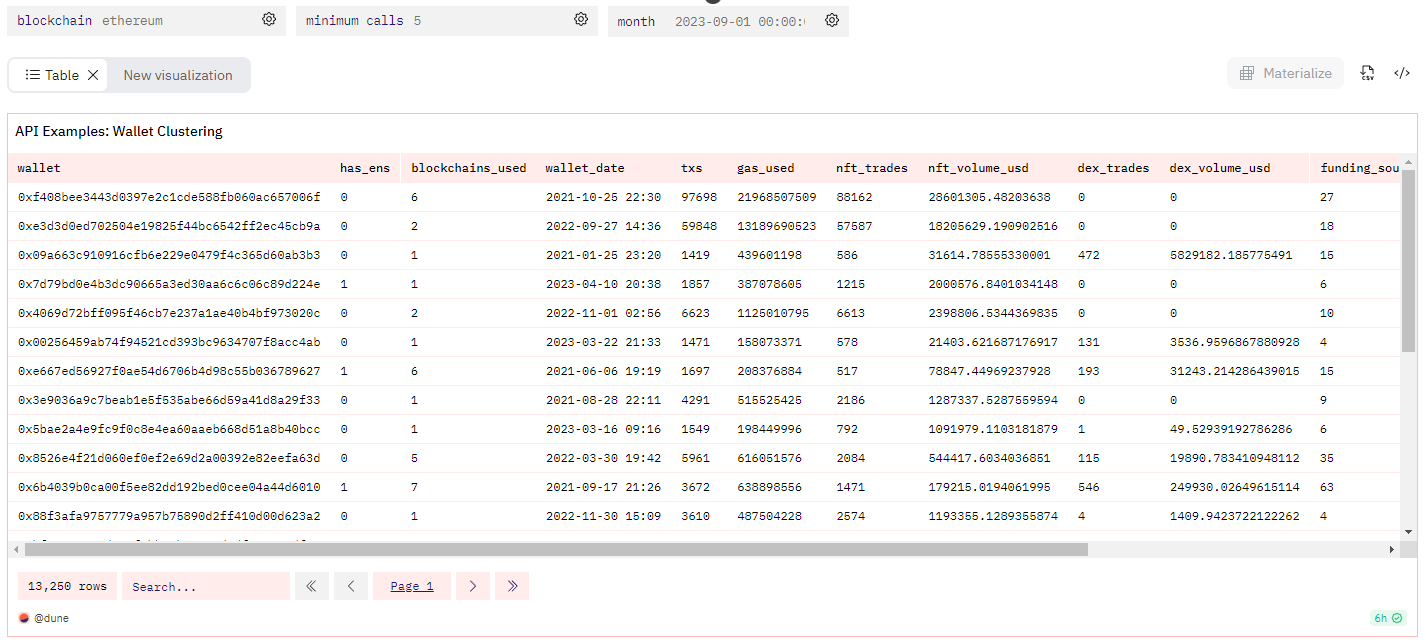

This query uses the following data sources:
- ENS spell
- dex.trades and nft.trades
- CEX address labels
- Raw transactions

## Pulling the data from the API

Let's run the query for Opensea seaport:

In [ ]:
#you should use a .env file for your api key, MAKE SURE TO NEVER COMMIT YOUR KEY ON A PUBLIC REPO.
from dotenv import load_dotenv
import os

# Get the current working directory
current_directory = os.getcwd()
env_path = os.path.join(current_directory, '.env')

load_dotenv(env_path)

api_key = os.getenv('api_key')

print(api_key)

In [19]:
import pandas as pd
from dune_client.client import DuneClient

dune = DuneClient.from_env()
results = dune.get_latest_result(3070841) #, max_age_hours=8)

ContextualVersionConflict: (Deprecated 1.2.13 (c:\users\13104\anaconda3\envs\dev\lib\site-packages), Requirement.parse('Deprecated>=1.2.14'), {'dune-client'})

It costs 0 credits to run on the free engine in Y minutes, and costs Z credits for the Z datapoints I will be exporting. That's XYZ credits total, out of your 2500 free tier credits. We're going to use the latest results endpoint.

## Clustering the wallets

Let's do PCA and Clustering (elbow and stuff)

## What comes next?

Go add fork the query and add more features, change the contracts, change the number of clusters, etc.